# Semester Project
**University of Illinois**
<br>CSC 570 - Data Science Essentials
<br>Author: Arthur Putnam

## Project Directions

1. You pick the topic. I'm leaving the project open ended because I want to help you develop the creativity necessary to be a good data scientist.

2. Once you pick a topic, you probably need some hypothesis. What specifically would you like to prove, disprove, or model?

3. On or before Midterm you'll need to propose your topic and plan to me. Unapproved final projects will not be graded/accepted.

4. The final presentation format will be a youtube.com video.  You will need to verbally present your problem and your solution.  This should be done in conjunction with appropriate slides and/or code walk throughs.  Presentation matters.   

## Project Topic
Find correlations between prices of related items on a video game called runescape and be able to make predictions on prices using prices of other items. 

The item I will be using for demonstration is a prayer potion. These potions are quite valuable in the game and are frequently used. Their price tends to change with the game's economy. Finding correlations between items and being able to predict the future price on those items could result is big savings or making profits on when the right 'time' is to sell.

### Project Goals
* Find correlations between items
* Make predictions based on correlations 
* Make code reusable so a new itemset can be easy loaded and calculations can be recalculated

## Data Set
Each row of the data set contains the prices for all of the targeted items along with the date.

### Obtaining the data
The data set for this project was mine from the Runescape api. I created a script that could be easily reused to obtain different data sets from the api. It takes an itemset and makes api calls to get the data from Runescapes public api. The script then formats and transforms the data. Lastly it writes it out to a csv file. 

(this script ('data_mine.py) can be found in the same directory as this file)

## Hypothesis 
My hypothesis is that prayer potion's price is solely based on the materials that are used to make the potion. The current materials that needed to create the potion are: 
* vial
* ranarr weed
* snape grass

In [295]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import explained_variance_score
from pandas import Series
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [296]:
#df = pd.read_csv("prayer_pot.csv");
df = pd.read_csv("herbs.csv");
columns = list(df.columns.values)
continuous = [column for column in columns 
              if column in list(df.describe().columns)]
TARGET = 'Prayer potion(3)_139'

In [297]:
df

,date,Prayer potion(3)_139,Snape grass_231,Ranarr weed_257,Ranarr seed_5295,Vial_229,Vial of water_227,Super restore(3)_3026,Avantoe_261,Kwuarm_263,Cadantine_265,Dwarf weed_267,Torstol_269,Marrentill_251,Tarromin_253,Harralander_255,Irit leaf_259,Guam leaf_249
0,06-19-2017,7252,35,7731,30225,2,4,7705,2445,2749,1674,895,4306,21,143,572,1006,11
1,06-20-2017,7220,35,7806,31012,2,5,7665,2482,2697,1637,905,4314,21,137,553,1039,11
2,06-21-2017,7230,35,7830,31050,3,5,7665,2458,2717,1637,905,4314,20,131,562,1090,11
3,06-22-2017,7356,36,7879,30750,2,5,7642,2458,2717,1637,943,4423,20,131,562,1090,11
4,06-23-2017,7328,37,7958,30831,3,5,7642,2492,2754,1637,943,4423,21,135,566,1086,12
5,06-24-2017,7380,37,7856,30443,3,5,7685,2540,2744,1691,966,4424,22,138,544,1063,13
6,06-25-2017,7397,38,7822,30160,3,5,7685,2540,2744,1691,966,4424,22,138,537,1063,13
7,06-26-2017,7367,37,7795,29819,3,5,7818,2584,2773,1691,939,4575,22,134,524,1086,13
8,06-27-2017,7298,38,7827,29741,3,5,7818,2590,2702,1694,939,4600,20,131,541,1110,12
9,06-28-2017,7290,38,7838,30002,3,5,7821,2590,2702,1694,938,4600,20,131,533,1110,12


# The item of interest

date
2017-06-19    7252
2017-06-20    7220
2017-06-21    7230
2017-06-22    7356
2017-06-23    7328
Name: Prayer potion(3)_139, dtype: int64
Last 6 months of prices


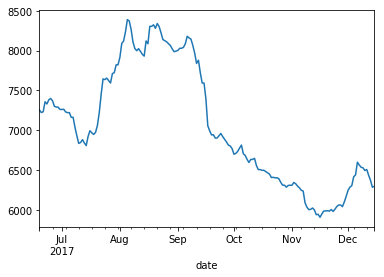

In [298]:
series = Series.from_csv('prayer_pot.csv', header=0)
print(series.head())
series.plot()
print("Last 6 months of prices")
pyplot.show()

# Part 1 (EDA)
## Types of varibles
All the varibles are continuous except the date column which can be consided as a label. 

## Are there missing values?
No missing values. 

In [299]:
print("Missing values")
for column in columns:
    print(column,df[df[column].isnull()].shape[0])

Missing values
date 0
Prayer potion(3)_139 0
Snape grass_231 0
Ranarr weed_257 0
Ranarr seed_5295 0
Vial_229 0
Vial of water_227 0
Super restore(3)_3026 0
Avantoe_261 0
Kwuarm_263 0
Cadantine_265 0
Dwarf weed_267 0
Torstol_269 0
Marrentill_251 0
Tarromin_253 0
Harralander_255 0
Irit leaf_259 0
Guam leaf_249 0


## Min, Max, Mean, and Standard Deviation of the continuous variables

In [300]:
df.describe()

,Prayer potion(3)_139,Snape grass_231,Ranarr weed_257,Ranarr seed_5295,Vial_229,Vial of water_227,Super restore(3)_3026,Avantoe_261,Kwuarm_263,Cadantine_265,Dwarf weed_267,Torstol_269,Marrentill_251,Tarromin_253,Harralander_255,Irit leaf_259,Guam leaf_249
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,7045.138889,39.388889,7476.716667,33859.722222,2.722222,4.788889,7538.927778,2390.633333,2464.655556,1661.394444,981.694444,6827.438889,19.738889,133.266667,537.744444,1042.677778,16.188889
std,748.968503,3.451805,802.681966,3449.389273,0.518437,0.668433,784.421269,143.154091,161.790309,121.674697,54.344967,1163.605210,2.600739,10.914395,20.740246,63.187816,2.711014
min,5903.000000,34.000000,6236.000000,28448.000000,2.000000,3.000000,6448.000000,2068.000000,2157.000000,1527.000000,888.000000,4306.000000,15.000000,116.000000,503.000000,917.000000,11.000000
25%,6402.250000,37.000000,6780.750000,30666.250000,2.000000,4.000000,6818.750000,2308.750000,2330.250000,1575.000000,929.750000,6258.000000,18.000000,126.000000,523.750000,983.000000,14.000000
50%,6923.500000,38.000000,7345.500000,33395.000000,3.000000,5.000000,7561.500000,2390.500000,2462.500000,1616.000000,992.000000,7247.000000,19.000000,131.000000,533.000000,1053.000000,16.000000
75%,7745.750000,41.000000,8253.000000,36821.750000,3.000000,5.000000,8119.250000,2459.750000,2581.250000,1692.000000,1021.000000,7503.000000,21.000000,137.250000,550.000000,1090.000000,18.000000
max,8388.000000,52.000000,8926.000000,42960.000000,4.000000,7.000000,8901.000000,2798.000000,2773.000000,1981.000000,1089.000000,8893.000000,28.000000,161.000000,609.000000,1167.000000,22.000000


## Histograms describing the distribution of the variable

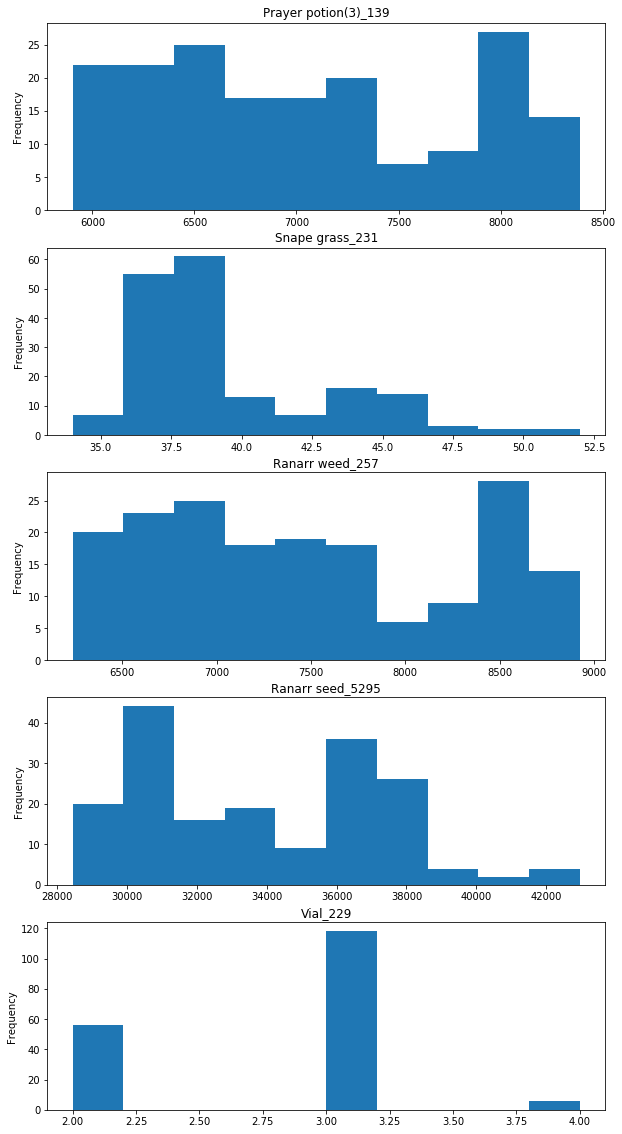

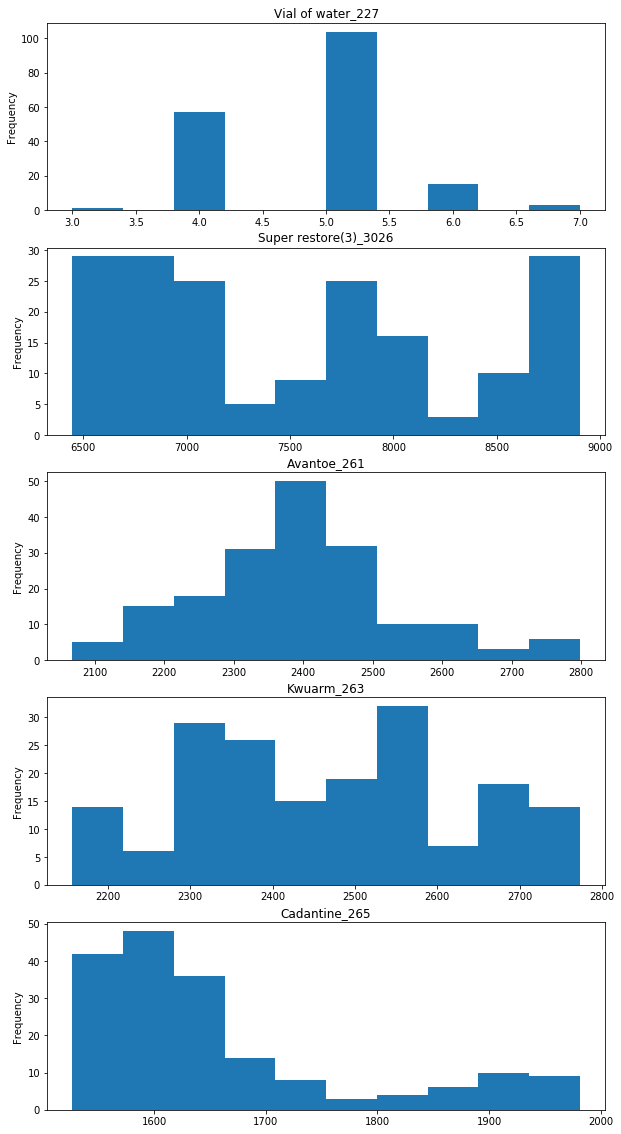

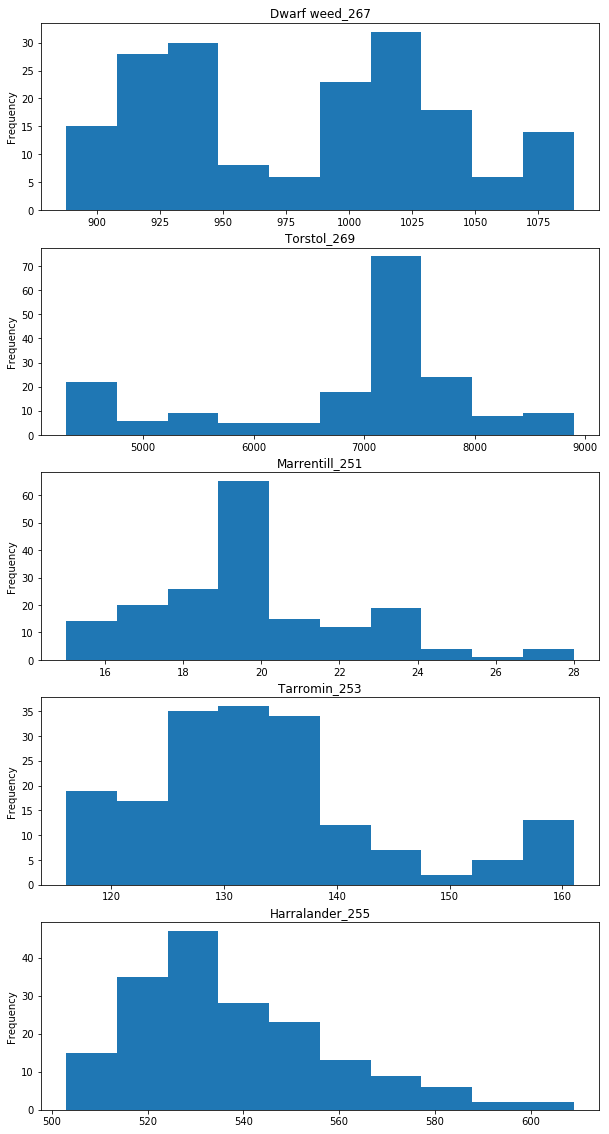

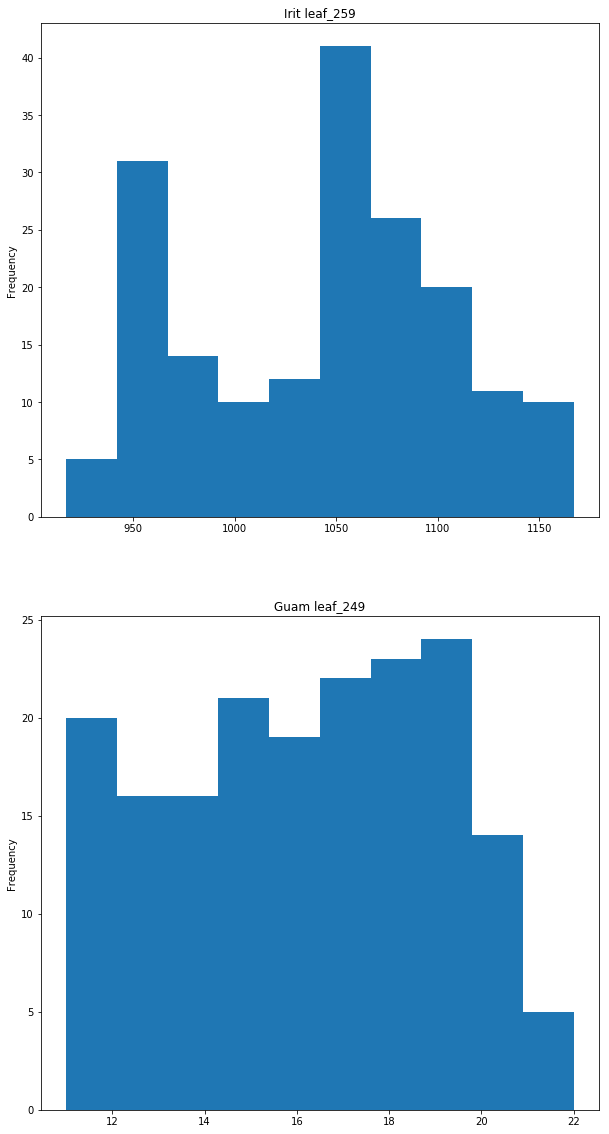

In [301]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

# this is need for displaying better.
plots = chunks(continuous, 5)
for varibles in plots:
    fig, axs = plt.subplots(nrows=len(varibles), ncols=1)
    for i, varible in  enumerate(varibles):
        df[varible].plot(kind='hist', ax=axs[i], title=varible, figsize=(10, 20))

## Correlation Matrix 

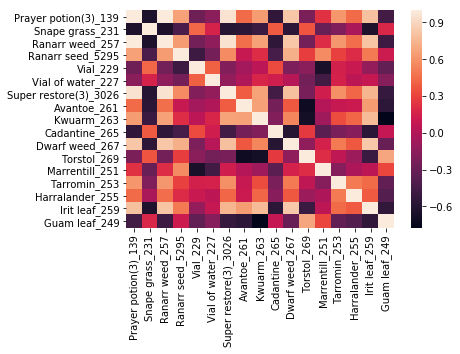

In [302]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As we can see by the correlation matrix we can see that there is high correlation between prayer potions and the following items:

* Ranarr Weed
* Super restore
* Ranarr Seed
* Super Restore
* Dwarf Weed
* Tarromin
* Irit Leaf

(only looking at the ones that are related to prayer potion)

In [303]:
Y = df[TARGET]

# Found worse results using only strongly correlated results
# HIGH_CORRELATION = corr[corr['Prayer potion(3)_139'] > .50].index 

HIGH_CORRELATION = columns

# Create dataframe with important features
X = pd.DataFrame()
for column in columns:
    if column != TARGET and column != 'date' and column in HIGH_CORRELATION:
        X[column] = df[column]

# scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Auto Tuning

In [305]:
import numpy as np

values = []
for i in np.arange(0.0001, 1, 0.0001).tolist():
    model = LogisticRegression(penalty='l2', C=i)
    model.fit(X_train, y_train)
    values.append((explained_variance_score(y_test,model.predict(X_test)), i))

values_sorted = sorted(values, reverse=True)
minv =  sorted(values, reverse=False)
print(values_sorted[0], values_sorted[1])
print(minv[0], minv[1])

my_best_model = LogisticRegression(penalty='l2', C=values_sorted[0][1])
my_best_model.fit(X_train, y_train)

(0.98838132550654345, 0.9999) (0.98838132550654345, 0.9998)
(0.84553665105779019, 0.0015) (0.84553665105779019, 0.0016)


LogisticRegression(C=0.9999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [306]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

In [307]:
def model_stats(model, x, y):
    predict = model.predict(x)
    print("Explained variance regression is %2.2f" % explained_variance_score(y, predict))
    print("r2 score is                      %2.2f" % r2_score(y, predict))
    print("mean absolute error is           %2.2f" % mean_absolute_error(y, predict))
    print("mean squared error is            %2.2f" % mean_squared_error(y, predict))
    print("median absolute error is         %2.2f" % median_absolute_error(y, predict))    

## Model Preformance

In [308]:
model_stats(my_best_model, X_test, y_test)

Explained variance regression is 0.99
r2 score is                      0.99
mean absolute error is           53.92
mean squared error is            7049.42
median absolute error is         34.00


In [309]:
scoring = ['r2']
scores = cross_validation.cross_val_score(my_best_model, X, Y, scoring=scoring[0], cv=2)
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci
print ("Score is %f +/-  %f" % (mean_score, ci))

Score is 0.947759 +/-  0.075804


# Summary & Interesting Findings

### Predictions and Model
My model did not predict any of the prices exactly right but using r^2 and explained variance regression I think the model was still fairly accurate at predicting price estimates. 

### Hypothesis
My hypothesis was close but not correct. One of the three materials of the potion had high correlation but so did several other herbs and potions.

Price was correlated to: 
* Ranarr Weed
* Super restore
* Ranarr Seed
* Super Restore
* Dwarf Weed
* Tarromin
* Irit Leaf

### Using highly correlated features
My model actually preformed slightly worse when it was trained only using the features that were highly correlated. 

* Cross validation with highly correlated features was 0.0.935761
* Cross validation with all features was 0.947759